In [117]:
import csv
import random
import numpy as np
import matplotlib.pyplot as plt
import operator

In [161]:
def loadDataset(filename, split, trainingSet=[] , testSet=[]):    
    with open(filename, 'r') as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        for x in range(len(dataset)):
            for y in range(4):
                dataset[x][y] = float(dataset[x][y])
            if (random.random() < split) & (len(trainingSet)<round(split*len(testSet))) :
                trainingSet.append(dataset[x])
            else:
                testSet.append(dataset[x])

In [189]:
TrainingSet=[]
TestSet=[]
path = 'C:\\Users\\omarb\\Documents\\Introduction to AI\\Jupyter\\Datasets\\iris.data.txt'
loadDataset(path, 0.7, TrainingSet, TestSet)
print ('Train: ' + repr(len(TrainingSet)))
print ('Test: ' + repr(len(TestSet)) )

Train: 62
Test: 88


In [120]:
import math

def euclideanDistance(instance1, instance2, length):
    x1 = instance1[:length]
    x2 = instance2[:length]
    res = [(i[0]-i[1])**2 for i in zip(x1,x2)]
    return np.sqrt(sum(res))

In [121]:
data1 = [2, 2, 2,'a']
data2 = [4, 4, 4,'b']
distance = euclideanDistance(data1, data2, 3)
print('Euclidean distance: ' + repr(distance))

Euclidean distance: 3.4641016151377544


In [122]:
def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

In [123]:
trainSet = [[2, 2, 2, 'a'], [4, 4, 4, 'b']]
testInstance = [5, 5, 5]
k = 1
neighbors = getNeighbors(trainSet, testInstance, 1)
print(neighbors)

[[4, 4, 4, 'b']]


In [124]:
classVotes = {}
classVotes['neighbors'] = 1
classVotes['neighbors'] +=1
classVotes

{'neighbors': 2}

In [125]:
def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1] #complete with appropriate number
        if response in classVotes:
            classVotes[response] = classVotes[response] + 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

In [126]:
neighbors = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]
response = getResponse(neighbors)
print(response)

a


In [127]:
def getAccuracy(testSet, predictions):
    correct = 0
    for i in range(len(testSet)):
        if testSet[i][-1] == predictions[i]:
            correct+=1    
    return (correct/float(len(testSet))) * 100.0

In [128]:
testSet = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]
predictions = ['a', 'a', 'a']
accuracy = getAccuracy(testSet, predictions)
print(accuracy)

66.66666666666666


# KNN  

In [129]:
def predict(testInstance,TrainingSet,K):
    neighbors = [getNeighbors(TrainingSet, i, K) for i in testInstance]
    return list(map(getResponse,neighbors))

In [238]:
n = 15
acc_max = 0
K_opt = 15
scores_euc=[]
for K in range(1,n):
    predictions = predict(TestSet,TrainingSet,K)
    accurancy = getAccuracy(TestSet, predictions)
    if (accurancy > acc_max) & (K<K_opt):
        acc_max = accurancy
        K_opt = K
    print('Accurancy is '+ repr(accurancy))
    print('K_opt is '+ repr(K_opt))
    scores_euc.append(accurancy)
print('optimal K is '+ repr(K_opt)+' with '+repr(acc_max)+' accurancy')

Accurancy is 93.18181818181817
K_opt is 1
Accurancy is 93.18181818181817
K_opt is 1
Accurancy is 96.5909090909091
K_opt is 1
Accurancy is 95.45454545454545
K_opt is 1
Accurancy is 95.45454545454545
K_opt is 1
Accurancy is 95.45454545454545
K_opt is 1
Accurancy is 95.45454545454545
K_opt is 1
Accurancy is 95.45454545454545
K_opt is 1
Accurancy is 94.31818181818183
K_opt is 1
Accurancy is 94.31818181818183
K_opt is 1
Accurancy is 94.31818181818183
K_opt is 1
Accurancy is 94.31818181818183
K_opt is 1
Accurancy is 94.31818181818183
K_opt is 1
Accurancy is 94.31818181818183
K_opt is 1
optimal K is 1 with 93.18181818181817 accurancy


In [203]:
# define new metric: Manhattan distance
def ManhattanDistance(instance1, instance2, length):
    x1 = instance1[:length]
    x2 = instance2[:length]
    res = [abs(i[0]-i[1]) for i in zip(x1,x2)]
    return np.sqrt(sum(res))

In [204]:
def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = ManhattanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

In [240]:
acc_max = 0
K_opt = 15
scores_man=[]
for K in range(1,n):
    predictions = predict(TestSet,TrainingSet,K)
    accurancy = getAccuracy(TestSet, predictions)
    if (accurancy > acc_max) & (K<K_opt):
        acc_max = accurancy
        K_opt = K
    print('Accurancy is '+ repr(accurancy))
    print('K_opt is '+ repr(K_opt))
    scores_man.append(accurancy)
print('optimal K is '+ repr(K_opt)+' with '+repr(acc_max)+' accurancy')

Accurancy is 93.18181818181817
K_opt is 1
Accurancy is 93.18181818181817
K_opt is 1
Accurancy is 96.5909090909091
K_opt is 1
Accurancy is 95.45454545454545
K_opt is 1
Accurancy is 95.45454545454545
K_opt is 1
Accurancy is 95.45454545454545
K_opt is 1
Accurancy is 95.45454545454545
K_opt is 1
Accurancy is 95.45454545454545
K_opt is 1
Accurancy is 94.31818181818183
K_opt is 1
Accurancy is 94.31818181818183
K_opt is 1
Accurancy is 94.31818181818183
K_opt is 1
Accurancy is 94.31818181818183
K_opt is 1
Accurancy is 94.31818181818183
K_opt is 1
Accurancy is 94.31818181818183
K_opt is 1
optimal K is 1 with 93.18181818181817 accurancy


<ipython-input-242-8bf7b7c91f67>:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot([K for K in range(1,n)],scores_euc,linestyle=':',Linewidth=5)
<ipython-input-242-8bf7b7c91f67>:2: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot([K for K in range(1,n)],scores_man,linestyle='-.',Linewidth=3)


Text(0.5, 1.0, 'KNN accurancy')

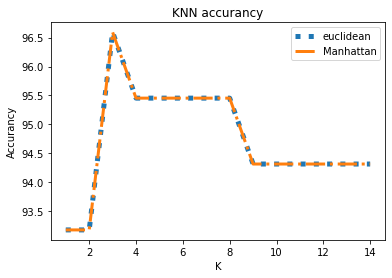

In [242]:
plt.plot([K for K in range(1,n)],scores_euc,linestyle=':',Linewidth=5)
plt.plot([K for K in range(1,n)],scores_man,linestyle='-.',Linewidth=3)
plt.ylabel('Accurancy')
plt.xlabel('K')
plt.legend(['euclidean','Manhattan'])
plt.title('KNN accurancy')